dataset's dimensions: (1797, 64)


<Figure size 640x480 with 0 Axes>

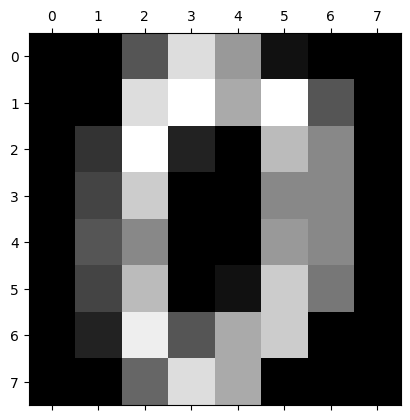

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim

digits = load_digits()
print("dataset's dimensions:", digits.data.shape)
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [17]:
# this function loads train and test sets from digits dataset
def load_data(batch_size):
    X = digits.data
    y = digits.target

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
    
    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader, test_dataset, test_loader
    

In [18]:
# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))
        x = torch.softmax(self.output(x), dim=1)
        return x

In [19]:
# Training loop
def train(model, data, optimizer, training_epochs, output_size, criterion, batch_size):
    train_loader, y_train, X_test, y_test = data
    correct = 0
    total = 0
    for epoch in range(training_epochs):
        for images, labels in train_loader:
            # One-hot encode the labels
            labels_one_hot = torch.nn.functional.one_hot(labels, num_classes=output_size).float()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels_one_hot)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            
            # Print gradients
            print(f'Epoch [{epoch+1}/{training_epochs}], Batch: {total//batch_size + 1}')
            for param in model.parameters():
                if param.grad is not None:
                    print(f'grad: {param.grad} dim: {param.grad.shape}')
                    return
                
            optimizer.step()
            
            # Track the loss and accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
        epoch_accuracy = 100 * correct / total
        if epoch % 20 == 19:
            print(f'Epoch [{epoch+1}/{training_epochs}], Loss: {loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

In [20]:
# Main function to run the experiments
def main():
    batch_size = 128
    input_size = 64  # For the digits dataset (8x8 images flattened)
    hidden_size = 20
    output_size = 10
    epochs = 200
    data = load_data(batch_size)

    print("Training with SGD LR 0.5")
    model = SimpleNN(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.5)

    train(model, data, optimizer, epochs, output_size, criterion, batch_size)
    
    print("Training with SGD LR 0.01")
    model = SimpleNN(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train(model, data, optimizer, epochs, output_size, criterion, batch_size)
    
if __name__ == "__main__":
    main()

Training with SGD LR 0.5
Epoch [1/200], Batch: 1
grad: tensor([[ 0.0000e+00,  1.6762e-05,  1.2302e-04,  ..., -1.2872e-04,
          1.9090e-04,  5.6087e-05],
        [ 0.0000e+00,  8.6047e-07, -4.4102e-05,  ..., -6.1515e-04,
         -3.2063e-04, -5.2904e-05],
        [ 0.0000e+00,  1.4456e-04,  1.4591e-03,  ...,  1.3458e-03,
          4.3414e-04, -7.8088e-05],
        ...,
        [ 0.0000e+00, -1.6054e-07, -2.0148e-06,  ...,  2.1621e-05,
          2.0131e-06,  3.9004e-07],
        [ 0.0000e+00, -4.3713e-05, -3.1180e-04,  ...,  4.2646e-05,
          9.5213e-05,  4.9806e-05],
        [ 0.0000e+00,  6.5481e-05,  6.6610e-04,  ...,  3.5723e-04,
         -4.6400e-06, -2.2666e-05]]) dim: torch.Size([20, 64])
Training with SGD LR 0.01
Epoch [1/200], Batch: 1
grad: tensor([[ 0.0000e+00,  4.3823e-06,  1.0818e-04,  ...,  2.6086e-04,
          2.2191e-04,  1.2885e-04],
        [ 0.0000e+00,  1.8560e-05,  3.5501e-04,  ...,  5.2333e-04,
          1.4971e-04,  5.1928e-05],
        [ 0.0000e+00, -2.